## Analisis exploratorio de datos

## df_yelp

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
_yelp = pd.read_parquet("D:\Desktop\\proyecto_grupal\\Dataset parquet\\df_yelp.parquet")

In [40]:
df_yelp = pd.read_parquet("/content/df_yelp.parquet")

In [ ]:
# Dimensiones del dataset
print("Dimensiones:", df_yelp.shape)

Dimensiones: (5177, 22)


In [ ]:
# Conteo de valores nulos por columna
print("Valores nulos por columna:\n", df_yelp.isnull().sum())


Valores nulos por columna:
 business_id       0
name              0
address           5
city              0
state             0
postal_code       1
latitude          0
longitude         0
stars_x           0
review_count      0
is_open           0
attributes        2
categories        0
hours           161
text              0
cool              0
stars_y           0
date              0
funny             0
review_id         0
useful            0
user_id           0
dtype: int64


### Revisar duplicados en las columnas más importantes

In [ ]:
# 1. Verificar duplicados en 'name' y 'address' combinados (para ver si hay negocios con el mismo nombre y dirección)
duplicates_name_address = df_yelp.duplicated(subset=['name', 'address',"city","postal_code"]).sum()
print(f"Duplicados en 'name','address','city', 'postal_code': {duplicates_name_address}")

# 2. Verificar duplicados en 'review_id'
duplicates_review_id = df_yelp.duplicated(subset='review_id').sum()
print(f"Duplicados en 'review_id': {duplicates_review_id}")

Duplicados en 'name','address','city', 'postal_code': 2531
Duplicados en 'review_id': 0


In [ ]:
df_yelp[df_yelp.duplicated(subset=['name', 'address',"city","postal_code"], keep=False)]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,text,cool,stars_y,date,funny,review_id,useful,user_id
0,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",Good was on par with your typical sports bar. ...,0,3,2015-01-11 22:49:33 UTC,0,CSebyfJjT740KKgE6IPYcg,0,ZYNEE_VRshepHB599zUWcA
1,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...","With chain restaurants, I write short reviews ...",0,4,2019-07-08 00:18:19 UTC,3,B5aECxALkQZgQQQ4oQiVSA,0,_TKXaTPT2Yu0rRFqYzs44g
2,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",Been wanting to come to twin peaks for a while...,0,5,2022-01-18 20:36:24 UTC,0,uOzC-IXnlc5hJ2h-0jNRKQ,0,ZphdnOBaO5Qd3STxXjspVw
5,Edg22x3CZkIv0GUib2oEFA,Mellow Mushroom,8227 Oak St,New Orleans,FL,70118,29.948624,-90.131250,3.5,149,...,"Pizza, Restaurants, Bars, Nightlife, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",Fun ambiance and food is good not great. Servi...,0,3,2019-09-14 22:43:20 UTC,0,YMpRLhAt7r2FYVp0JSpfdw,0,9lAp1eOFlvmA21pvLn6UsQ
6,Edg22x3CZkIv0GUib2oEFA,Mellow Mushroom,8227 Oak St,New Orleans,FL,70118,29.948624,-90.131250,3.5,149,...,"Pizza, Restaurants, Bars, Nightlife, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",The good. We had the pizza. Delicious crust. C...,0,3,2016-03-25 03:10:54 UTC,0,mNgCyN6iuDHrJFqLwEBqXQ,0,NEgCqpLI1QCN5TxKn23fiA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...","I've been here quite a few times, and I keep c...",1,3,2017-02-26 06:15:50 UTC,2,wCrGEMdMCfkfF1JTufCkyg,2,sfWQ65a8iAfeV0oC02WOcw
5172,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",This is a new place so they are still figuring...,0,4,2016-12-04 02:44:04 UTC,0,7iLCPEdCZG5S4vHoxW0j9A,0,MRfqD6CThb8kD7D7XG1oeQ
5173,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",First time having ramen as a celiac! The meat ...,0,4,2019-07-12 02:56:30 UTC,0,wKg4LVG-mPafJ8rgFhsnPA,0,nQvLgonk2ILzEDRMEdNsRQ
5174,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",I love this spot for yummy ramen. I don't real...,2,4,2021-06-20 17:13:08 UTC,0,hMSIDi4mxvVWglvox6ADvg,1,PFyt8ujcHS0Upp2rGL-TCQ


In [ ]:
# Mostrar filas duplicadas (si existen) en cada caso para su revisión

if duplicates_name_address > 0:
    print("\nDuplicados en 'name' y 'address':")
    print(df_yelp[df_yelp.duplicated(subset=['name', 'address',"city","postal_code"], keep=False)])

if duplicates_review_id > 0:
    print("\nDuplicados en 'review_id':")
    print(df_yelp[df_yelp.duplicated(subset='review_id', keep=False)])


Duplicados en 'name' y 'address':
                 business_id             name          address          city  \
0     seKihQKpGGnCeLuELRQPSQ       Twin Peaks   6880 E 82nd St  Indianapolis   
1     seKihQKpGGnCeLuELRQPSQ       Twin Peaks   6880 E 82nd St  Indianapolis   
2     seKihQKpGGnCeLuELRQPSQ       Twin Peaks   6880 E 82nd St  Indianapolis   
5     Edg22x3CZkIv0GUib2oEFA  Mellow Mushroom      8227 Oak St   New Orleans   
6     Edg22x3CZkIv0GUib2oEFA  Mellow Mushroom      8227 Oak St   New Orleans   
...                      ...              ...              ...           ...   
5171  2xxkaRy7rP5EUyjFt2J5kA      Nikka Ramen  5701 Calle Real        Goleta   
5172  2xxkaRy7rP5EUyjFt2J5kA      Nikka Ramen  5701 Calle Real        Goleta   
5173  2xxkaRy7rP5EUyjFt2J5kA      Nikka Ramen  5701 Calle Real        Goleta   
5174  2xxkaRy7rP5EUyjFt2J5kA      Nikka Ramen  5701 Calle Real        Goleta   
5175  2xxkaRy7rP5EUyjFt2J5kA      Nikka Ramen  5701 Calle Real        Goleta   

    

In [31]:
# Seleccionar columnas numéricas relevantes
numeric_columns = [ 'review_count', 'latitude', 'longitude']

Text(0.5, 1.02, 'Distribución de Variables Numéricas')

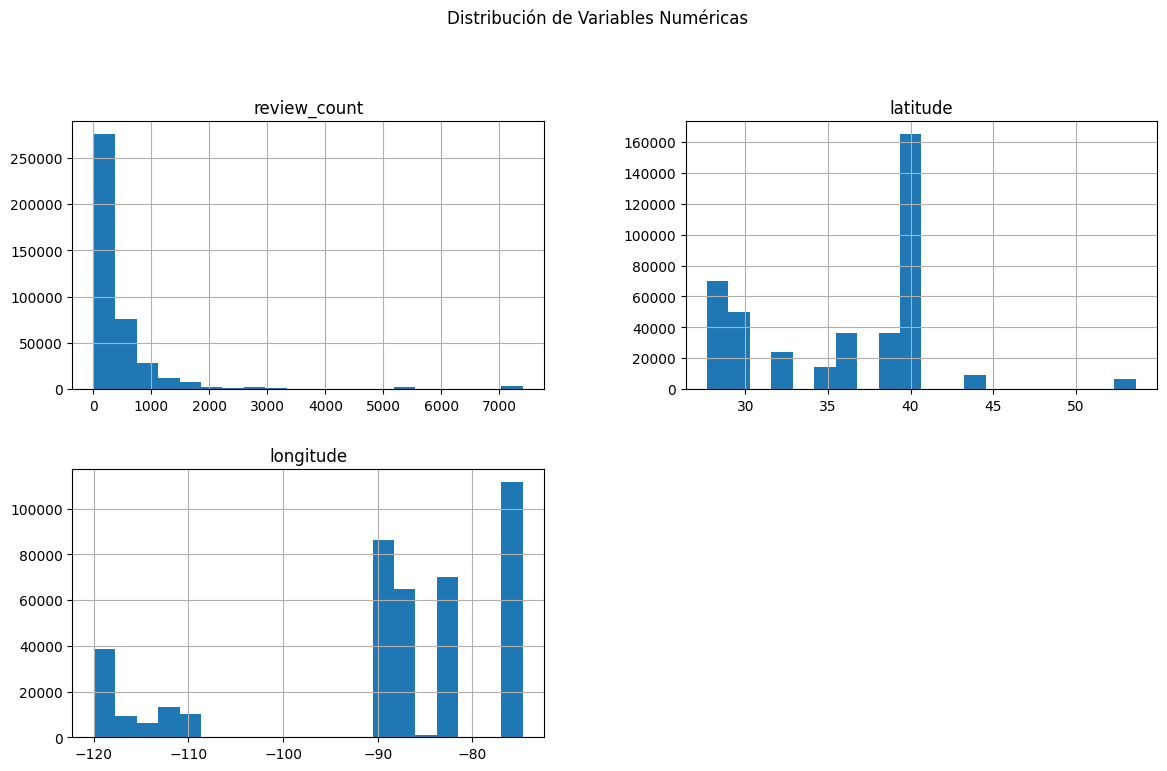

In [ ]:

df_yelp[numeric_columns].hist(bins=20, figsize=(14, 8))
plt.suptitle("Distribución de Variables Numéricas", y=1.02)

In [ ]:
# Filtrar negocios con 0 a 200 reseñas
businesses_0_200 = df_yelp[(df_yelp['review_count'] > 0) & (df_yelp['review_count'] <= 200)]
print(businesses_0_200[['name', 'review_count']].head(10))


                              name  review_count
1              Little Philadelphia           133
2              Bua Thai Restaurant            37
4                 Fishtown Brewpub            95
6                      Urban Shabu            24
8                       Keva Juice            74
9                      Bistro 1111            63
13  Guadalajara Mexican Restaurant           132
16                     Crushed Red            33
18               Gianna Restaurant           162
19                  5 Star Burgers           128


Observaciones
Rango de Reseñas:

La mayoría de estos negocios tiene menos de 200 reseñas, con un rango de 24 a 162. Esto indica que, a pesar de ser negocios que pueden estar funcionando, todavía tienen un potencial de crecimiento significativo.
Diversidad de Cuisines y Estilos:

La lista incluye una variedad de tipos de comida, desde restaurantes mexicanos (Guadalajara Mexican Restaurant) hasta opciones de fusión (Urban Shabu). Esto sugiere que hay una mezcla de estilos que podrían ser promovidos de diferentes maneras.

In [24]:
# Filtrar negocios con 200 a 1000 reseñas
businesses_200_1000 = df_yelp[(df_yelp['review_count'] > 200) & (df_yelp['review_count'] <= 1000)]
print(businesses_200_1000[['name', 'review_count']].head(10))


                                         name  review_count
5                                  Sushi Teri           266
7                                  El Poquito           394
10                      Yards Brewing Company           755
11                     Traders Point Creamery           319
12                                    Adele's           839
14                      Petra Cafe | Downtown           210
17                   Meraki-Greek Street Food           224
21                                       DuBu           509
24  Los Arroyos Mexican Restaurant & Take Out           353
26                              Café Adelaide           435


Observaciones
Rango de Reseñas:

Estos negocios tienen un rango de 210 a 839 reseñas, lo que indica que están logrando atraer a una base de clientes más sólida en comparación con aquellos que tienen menos de 200 reseñas.
Diversidad de Opciones:

Al igual que en la lista anterior, estos negocios ofrecen una variedad de opciones, desde sushi hasta comida griega y cervecerías. Esto sugiere que hay una buena mezcla de tipos de comida que podrían ser promovidos para atraer a diferentes públicos.

In [25]:
# Filtrar negocios con más de 1000 reseñas
businesses_above_1000 = df_yelp[df_yelp['review_count'] > 1000]
print(businesses_above_1000[['name', 'review_count']].head(10))


                                    name  review_count
0                       Acme Feed & Seed          1731
3     The Depot Craft Brewery Distillery          1245
15  Creole House Restaurant & Oyster Bar          1594
25                     Restaurant August          1326
35                 Sugarfire Smoke House          1113
42                           Café Amelie          2756
64                          The Pharmacy          3054
68                          Oceana Grill          7400
91            Ruby Slipper - New Orleans          5193
97                          The Pharmacy          3054


Observaciones
Altos Números de Reseñas:

Todos estos negocios tienen un número de reseñas que supera los 1000, lo que indica que han logrado una gran visibilidad y, probablemente, una buena reputación en sus respectivas comunidades.
Liderazgo en el Mercado:

Negocios como Oceana Grill (7400 reseñas) y Café Amelie (2756 reseñas) son claramente líderes en su categoría, lo que sugiere que tienen una clientela fiel y estrategias de marketing efectivas.
Variedad de Tipos de Negocios:

La lista incluye una mezcla de tipos de establecimientos, desde cervecerías hasta restaurantes de mariscos. Esto indica que hay una diversidad en la oferta que podría atraer a diferentes segmentos de clientes

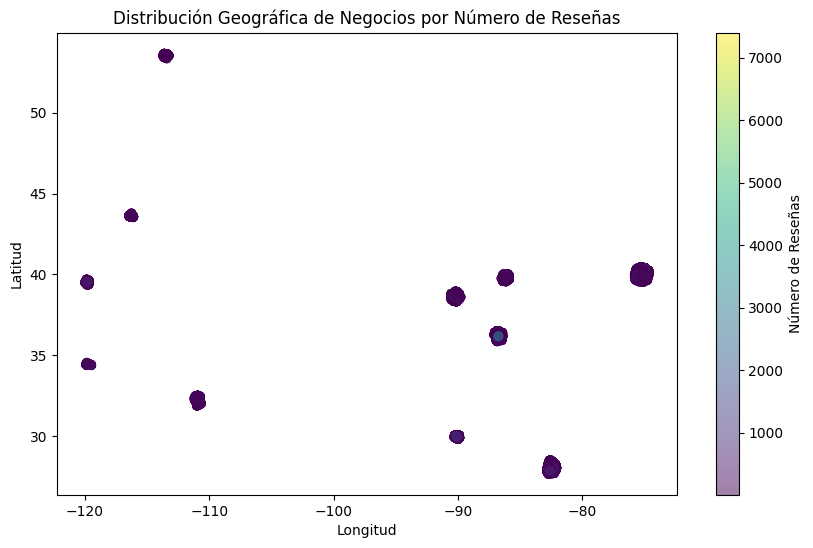

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df_yelp['longitude'], df_yelp['latitude'], c=df_yelp['review_count'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Número de Reseñas')
plt.title('Distribución Geográfica de Negocios por Número de Reseñas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [35]:
import folium
from google.colab import files

# Crear una muestra aleatoria de 4000 negocios para reducir el tamaño del archivo
df_yelp_sample = df_yelp.sample(4000)  # Muestra aleatoria de 1000 negocios

# Crear un mapa centrado en las coordenadas promedio de la muestra
map_center = [df_yelp_sample['latitude'].mean(), df_yelp_sample['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Agregar marcadores para cada negocio en la muestra
for _, row in df_yelp_sample.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color='blue' if row['review_count'] < 1000 else 'green',
        fill=True,
        fill_opacity=0.6,
        popup=row['name'] + f': {row["review_count"]} reseñas'
    ).add_to(m)

# Guardar el mapa
m.save("mapa_negocios.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Descargar el archivo HTML
files.download("mapa_negocios.html")

In [36]:
import folium
from folium.plugins import HeatMap
from google.colab import files

# Crear una muestra aleatoria de 4000 negocios
df_yelp_sample = df_yelp.sample(4000)

# Definir el centro del mapa basado en la muestra
map_center = [df_yelp_sample['latitude'].mean(), df_yelp_sample['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Crear la lista de coordenadas para el mapa de calor usando la muestra
heat_data = [[row['latitude'], row['longitude'], row['review_count']] for _, row in df_yelp_sample.iterrows()]

# Añadir el mapa de calor
HeatMap(heat_data).add_to(m)

# Guardar el mapa
m.save("mapa_calor_reseñas.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Descargar el archivo HTML
files.download("mapa_calor_reseñas.html")

<ipython-input-38-fe5e3ef16fc2>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_reviews = df_yelp.groupby([df_yelp['date'].dt.to_period("M"), 'name']).size().unstack(fill_value=0)


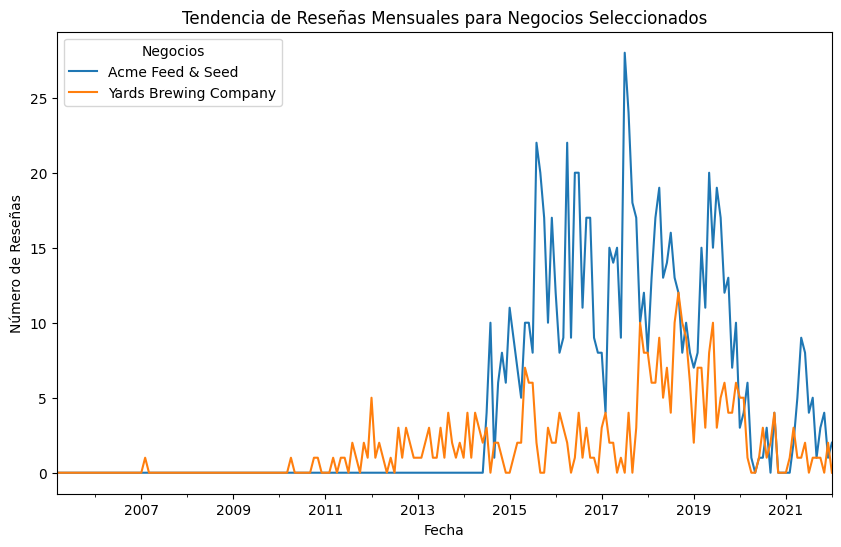

In [38]:
# Tendendia de negocio en el tiempo
import matplotlib.pyplot as plt

# Convertir la columna de fecha en tipo datetime
df_yelp['date'] = pd.to_datetime(df_yelp['date'])

# Agrupar reseñas por negocio y fecha, contando el número de reseñas por mes
monthly_reviews = df_yelp.groupby([df_yelp['date'].dt.to_period("M"), 'name']).size().unstack(fill_value=0)

# Graficar la tendencia de reseñas para algunos negocios
monthly_reviews[['Acme Feed & Seed', 'Yards Brewing Company']].plot(figsize=(10, 6))
plt.title('Tendencia de Reseñas Mensuales para Negocios Seleccionados')
plt.xlabel('Fecha')
plt.ylabel('Número de Reseñas')
plt.legend(title='Negocios')
plt.show()



Observando que Acme Feed & Seed muestra un volumen de reseñas que crece significativamente hasta alcanzar su punto más alto entre 2017 y 2019 y continúa hasta 2020, esto podría interpretarse de la siguiente forma:

Popularidad Creciente: Si el volumen de reseñas aumenta sostenidamente hasta un pico en 2005, sugiere un período de crecimiento en popularidad. Esto puede deberse a una combinación de factores como la calidad del servicio, el boca a boca, o incluso el efecto de la publicidad y promociones.

Estabilidad en la Experiencia del Cliente: La consistencia en el número de reseñas hasta 2020 podría indicar una base de clientes leal o una calidad estable en el servicio. Esta estabilidad es generalmente positiva, pero también implica que cualquier descenso repentino sería una señal importante a monitorear.

Posible Impacto de la Pandemia: Dado que el periodo de análisis llega hasta 2020, los últimos datos pueden estar influenciados por la pandemia de COVID-19, que afectó la actividad de muchos negocios. Si notas una caída en las reseñas a partir de este año, puede estar relacionada con cambios en las operaciones o en la experiencia del cliente durante ese tiempo.

Para hacer más preciso este análisis, podrías:

Comparar estos datos con otros negocios similares para ver si la tendencia de reseñas se replica.
Observar cómo se comportan los review_count en otros periodos o eventos significativos y explorar la posibilidad de relacionar esto con eventos específicos en tu análisis.

### outliers

In [ ]:
df_yelp.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'text', 'cool', 'stars_y', 'date',
       'funny', 'review_id', 'useful', 'user_id'],
      dtype='object')

In [ ]:
# Cálculo del IQR para identificar outliers en review_count
Q1_reviews = df_yelp['review_count'].quantile(0.25)
Q3_reviews = df_yelp['review_count'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews

# Límite inferior y superior para los outliers en review_count
lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews

# Filtrar outliers en review_count
outliers_reviews = df_yelp[(df_yelp['review_count'] < lower_bound_reviews) | (df_yelp['review_count'] > upper_bound_reviews)]

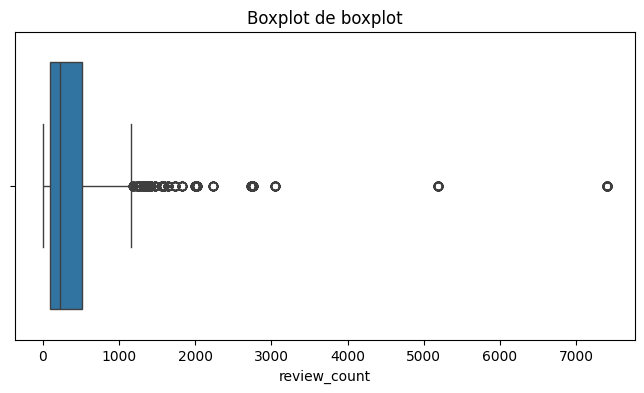

In [ ]:
# Diagrama de caja (Boxplot) para detección de valores atípicos
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_yelp["review_count"])
plt.title(f"Boxplot de boxplot")
plt.show()

### Analizamos categories

Dividir las categorías

In [ ]:
from collections import Counter
from wordcloud import WordCloud

all_categories = df_yelp['categories'].dropna().str.split(', ').sum()

Contar la frecuencia de cada categoría

In [ ]:

category_counts = Counter(df_yelp['categories'])
top_categories = category_counts.most_common(10)  # Top 10 categorías

# Convertir el conteo de categorías en un DataFrame para visualización
df_top_categories = pd.DataFrame(top_categories, columns=['Category', 'Count'])
df_top_categories

,Category,Count
0,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",56
1,"Mexican, Restaurants",51
2,"Restaurants, Mexican",50
3,"Restaurants, American (Traditional), American ...",39
4,"Pizza, Restaurants",32
5,"Restaurants, Italian",32
6,"Restaurants, Pizza",31
7,"Thai, Restaurants",27
8,"Italian, Restaurants",26
9,"Burgers, Sandwiches, Food, Beer, Wine & Spirit...",25


Visualizar las categorías más comunes con un gráfico de barras

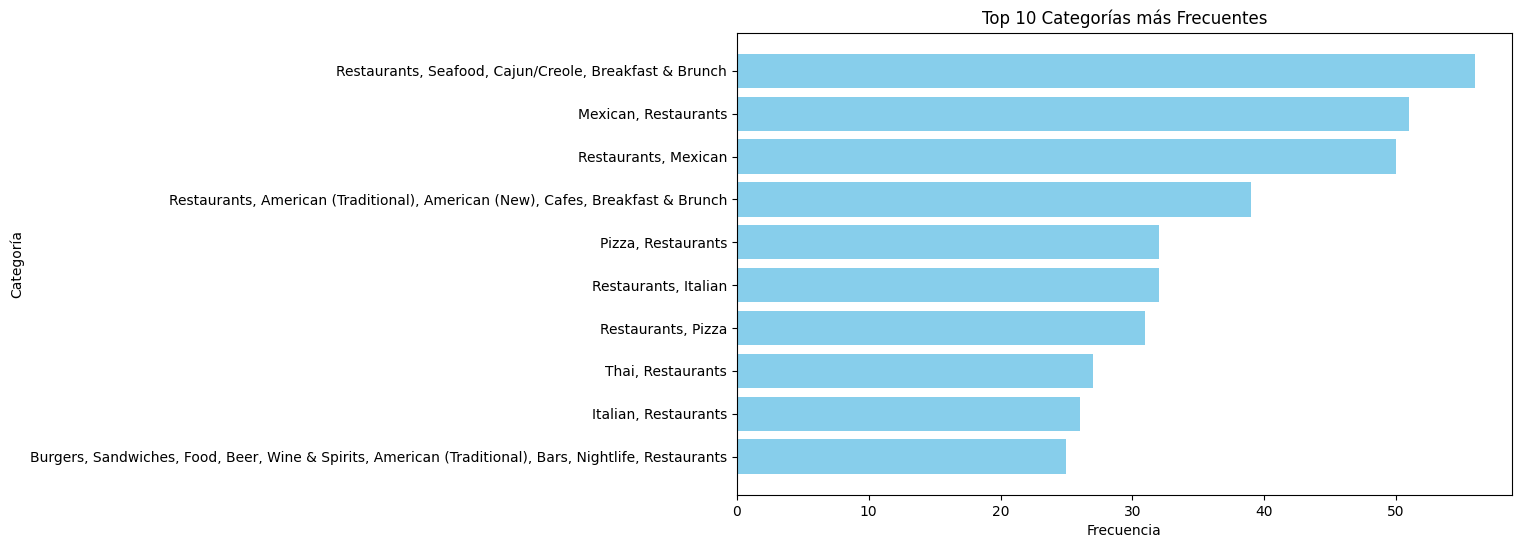

In [ ]:

plt.figure(figsize=(10, 6))
plt.barh(df_top_categories['Category'], df_top_categories['Count'], color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría')
plt.title('Top 10 Categorías más Frecuentes')
plt.gca().invert_yaxis()
plt.show()

 Visualización alternativa: Nube de palabras

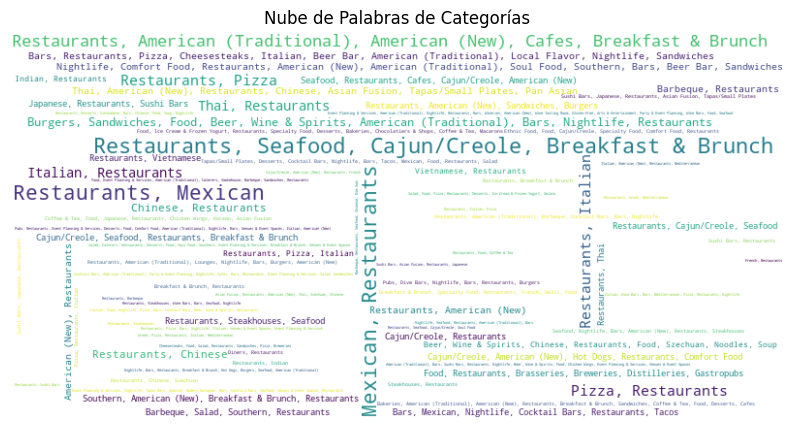

In [ ]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Categorías')
plt.show()

### Análisis de Variables Categóricas

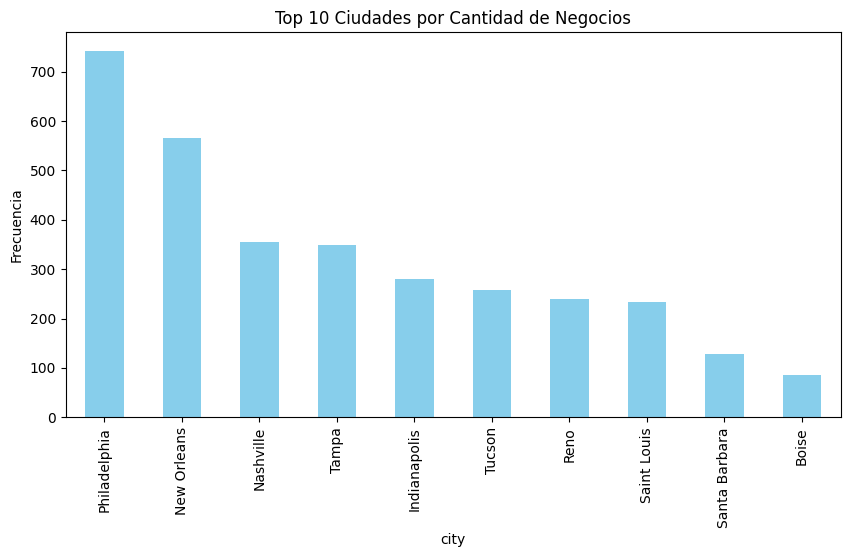

In [ ]:
# Conteo de frecuencias para las ciudades
top_cities = df_yelp['city'].value_counts().head(10)
top_cities.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Top 10 Ciudades por Cantidad de Negocios")
plt.ylabel("Frecuencia")
plt.show()

### Analsis de sentimiento positivas y negativas

In [ ]:
from textblob import TextBlob

# Función para determinar si el sentimiento es positivo o negativo
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # La polaridad va de -1 (negativo) a 1 (positivo)
    return 1 if analysis.sentiment.polarity > 0 else 0

# Aplicar el análisis de sentimiento en la columna 'text' y crear la nueva columna 'sentiment'
df_yelp['sentiment'] = df_yelp['text'].apply(analyze_sentiment)

# Mostrar los primeros resultados para verificar
print(df_yelp[['text', 'sentiment']].head())

                                                text  sentiment
0  Good was on par with your typical sports bar. ...          1
1  With chain restaurants, I write short reviews ...          1
2  Been wanting to come to twin peaks for a while...          1
3  This place is pretty well-run - it's always cl...          1
4  We ordered take-out from this new place, and s...          1


### Relación entre estrellas y número de reviews

In [ ]:
df_yelp.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'text', 'cool', 'stars_y', 'date',
       'funny', 'review_id', 'useful', 'user_id', 'sentiment'],
      dtype='object')

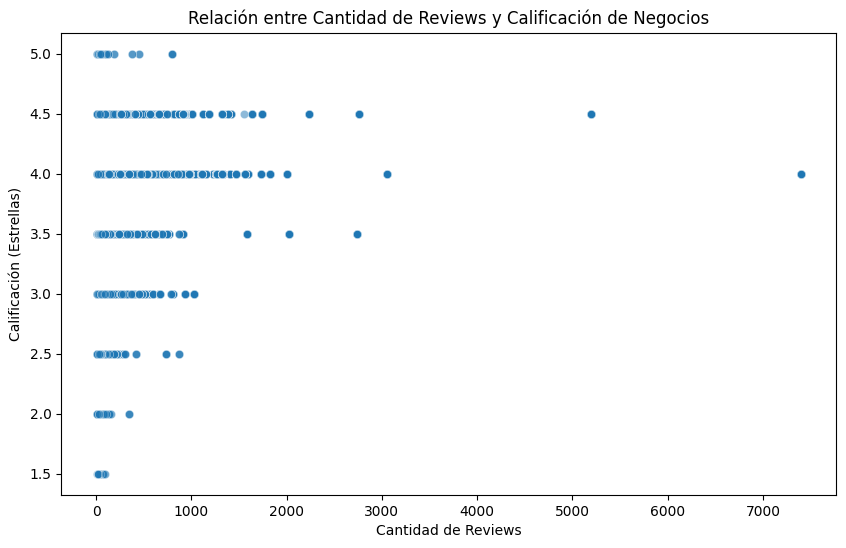

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='stars_x', data=df_yelp, alpha=0.5)
plt.title("Relación entre Cantidad de Reviews y Calificación de Negocios")
plt.xlabel("Cantidad de Reviews")
plt.ylabel("Calificación (Estrellas)")
plt.show()


### Gráfico de torta para todas las calificaciones de estrellas

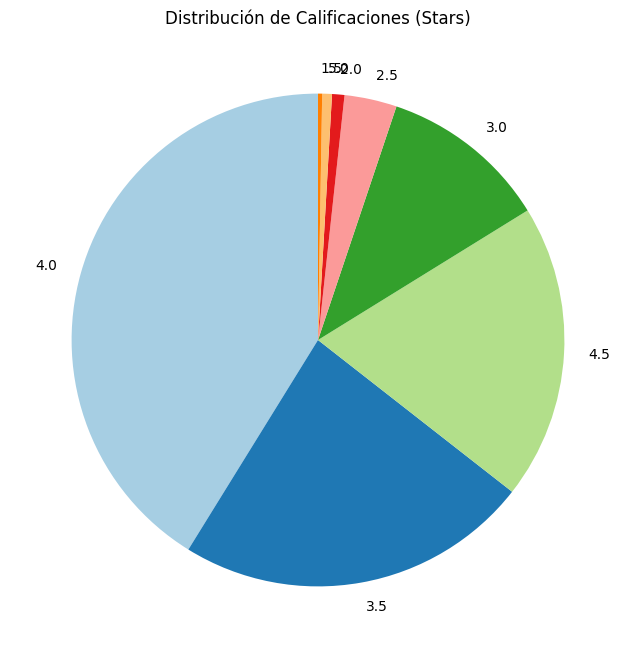

In [ ]:
# Conteo de todas las calificaciones de estrellas
stars_counts = df_yelp['stars_x'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(stars_counts, labels=stars_counts.index, startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribución de Calificaciones (Stars)")
plt.show()

## df_google

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_google_maps = pd.read_parquet("d:\\Downloads\\datasets\\df_google_maps.parquet")

### Revisar duplicados en las columnas más importantes

In [ ]:
df_google_maps.columns

NameError: name 'df_google_maps' is not defined

In [ ]:
duplicates_name_address = df_google_maps.duplicated(subset=['gmap_id', 'name','user_id']).sum()
print(f"Duplicados en 'name' y 'gmap_id': {duplicates_name_address}")


Duplicados en 'name' y 'gmap_id': 66611


In [ ]:
df_google_maps[df_google_maps.duplicated(subset=['gmap_id', 'name','user_id'], keep=False)]

,gmap_id,rating,text,resp,time,pics,name,user_id,name_1,address,gmap_id_1,description,latitude,longitude,category,avg_rating,num_of_reviews,price
1,0x88c33dd46be0d6f5:0xb0072e1b4b256f55,1,This place will be going out of business soon ...,{'text': 'Thank you for telling us about your ...,1621824342069,[],Eric Cerezo,1.173030e+20,Whiskey Joe's Bar & Grill - Manatee River,"Whiskey Joe's Bar & Grill - Manatee River, 531...",0x88c33dd46be0d6f5:0xb0072e1b4b256f55,None,27.528301,-82.508760,"[Restaurant, Bar & grill, Event venue, Seafood...",4.0,1557,$$
3,0x88c33dd46be0d6f5:0xb0072e1b4b256f55,1,This place will be going out of business soon ...,{'text': 'Thank you for telling us about your ...,1621824342069,[],Eric Cerezo,1.173030e+20,Whiskey Joe's Bar & Grill - Manatee River,"Whiskey Joe's Bar & Grill - Manatee River, 531...",0x88c33dd46be0d6f5:0xb0072e1b4b256f55,None,27.528301,-82.508760,"[Restaurant, Bar & grill, Event venue, Seafood...",4.0,1557,$$
4,0x88c33dd46be0d6f5:0xb0072e1b4b256f55,1,"Good place, good service, terrible food.\n""The...",{'text': 'Thank you for your review. We are so...,1605318215988,[{'url': ['https://lh5.googleusercontent.com/p...,karla katt,1.184348e+20,Whiskey Joe's Bar & Grill - Manatee River,"Whiskey Joe's Bar & Grill - Manatee River, 531...",0x88c33dd46be0d6f5:0xb0072e1b4b256f55,None,27.528301,-82.508760,"[Restaurant, Bar & grill, Event venue, Seafood...",4.0,1557,$$
7,0x88c33dd46be0d6f5:0xb0072e1b4b256f55,1,I know it's tough times staffing but this plac...,{'text': 'Thank you for telling us about your ...,1617729511183,[],Lynn Specter,1.044782e+20,Whiskey Joe's Bar & Grill - Manatee River,"Whiskey Joe's Bar & Grill - Manatee River, 531...",0x88c33dd46be0d6f5:0xb0072e1b4b256f55,None,27.528301,-82.508760,"[Restaurant, Bar & grill, Event venue, Seafood...",4.0,1557,$$
8,0x88c33dd46be0d6f5:0xb0072e1b4b256f55,1,Very slow service and poor communication\nWill...,{'text': 'Thank you for telling us about your ...,1623073970153,[],Dawn Fleischer,1.150902e+20,Whiskey Joe's Bar & Grill - Manatee River,"Whiskey Joe's Bar & Grill - Manatee River, 531...",0x88c33dd46be0d6f5:0xb0072e1b4b256f55,None,27.528301,-82.508760,"[Restaurant, Bar & grill, Event venue, Seafood...",4.0,1557,$$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944004,0x88d9ac53d705ebcb:0x1fadf36182fd0561,5,The brisket burger was absolutely fantastic!! ...,None,1433874756807,[],Steffen Cherry,1.017543e+20,Fuego by Mana,"Fuego by Mana, 3861 NE 163rd St, North Miami B...",0x88d9ac53d705ebcb:0x1fadf36182fd0561,"Stylish, industrial-chic eatery in lofty surro...",25.931476,-80.132497,"[Kosher restaurant, Barbecue restaurant, Hambu...",4.5,1231,₩₩₩
944005,0x88d9ac53d705ebcb:0x1fadf36182fd0561,5,Great food and service,None,1594344908998,[],David inglis,1.117995e+20,Fuego by Mana,"Fuego by Mana, 3861 NE 163rd St, North Miami B...",0x88d9ac53d705ebcb:0x1fadf36182fd0561,"Stylish, industrial-chic eatery in lofty surro...",25.931476,-80.132497,"[Kosher restaurant, Barbecue restaurant, Hambu...",4.5,1231,₩₩₩
944011,0x88d9ac53d705ebcb:0x1fadf36182fd0561,5,The brisket burger was absolutely fantastic!! ...,None,1433874756807,[],Steffen Cherry,1.017543e+20,Fuego by Mana,"Fuego by Mana, 3861 NE 163rd St, North Miami B...",0x88d9ac53d705ebcb:0x1fadf36182fd0561,"Stylish, industrial-chic eatery in lofty surro...",25.931476,-80.132497,"[Kosher restaurant, Barbecue restaurant, Hambu...",4.5,1231,₩₩₩
944035,0x88d9ac53d705ebcb:0x1fadf36182fd0561,5,Delicious food!!!,None,1599527147611,[],Rochi Tolces,1.035471e+20,Fuego by Mana,"Fuego by Mana, 3861 NE 163rd St, North Miami B...",0x88d9ac53d705ebcb:0x1fadf36182fd0561,"Stylish, industrial-chic eatery in lofty surro...",25.931476,-80.132497,"[Kosher restaurant, Barbecue restaurant, Hambu...",4.5,1231,₩₩₩


### outliers

In [ ]:
# Cálculo del IQR para identificar outliers en review_count
Q1_reviews = df_google_maps["num_of_reviews"].quantile(0.25)
Q3_reviews = df_google_maps['num_of_reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews

# Límite inferior y superior para los outliers en review_count
lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews

# Filtrar outliers en review_count
outliers_reviews = df_google_maps[(df_google_maps['num_of_reviews'] < lower_bound_reviews) | (df_google_maps['num_of_reviews'] > upper_bound_reviews)]

In [ ]:
outliers_reviews['num_of_reviews'].count()

56673

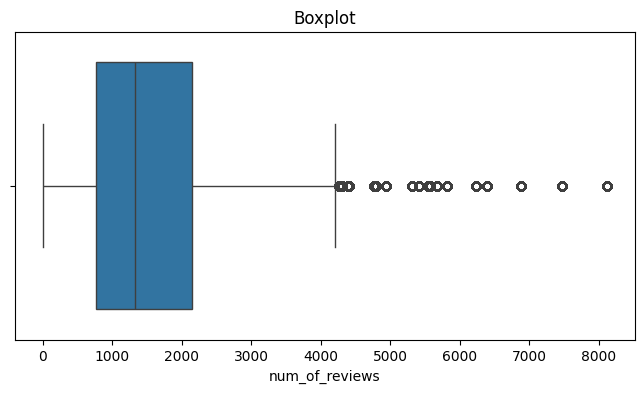

In [ ]:
# Diagrama de caja (Boxplot) para detección de valores atípicos
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_google_maps["num_of_reviews"])
plt.title(f"Grafico de Boxplot")
plt.show()

### Analizamos categories

Dividir las categorias

In [ ]:
from collections import Counter
from wordcloud import WordCloud

all_categories = df_google_maps['category'].dropna().str.split(', ').sum()

Contar la frecuencia de cada categoria

In [ ]:
# Aplanar los elementos de la columna 'category' si contiene listas o arrays
flat_categories = [item for sublist in df_google_maps['category'] for item in sublist]
category_counts = Counter(flat_categories)

# Obtener las 10 categorías más comunes
top_categories = category_counts.most_common(10)

# Convertir el conteo en un DataFrame para visualización
top_categories_df = pd.DataFrame(top_categories, columns=['Category', 'Count'])
print(top_categories_df)

               Category   Count
0            Restaurant  462632
1   American restaurant  295335
2  Fast food restaurant  246018
3  Breakfast restaurant  217996
4  Hamburger restaurant  177647
5    Seafood restaurant  153347
6     Family restaurant  131154
7         Sandwich shop  130272
8                   Bar  123870
9    Takeout restaurant  111887


Visualizar las categorias mas comunes

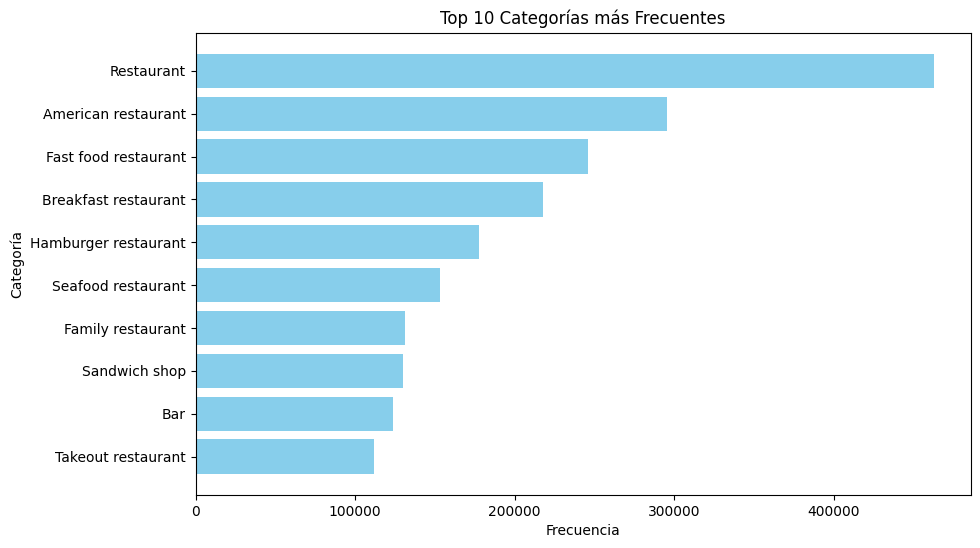

In [ ]:

plt.figure(figsize=(10, 6))
plt.barh(top_categories_df['Category'], top_categories_df['Count'], color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría')
plt.title('Top 10 Categorías más Frecuentes')
plt.gca().invert_yaxis()
plt.show()

### Análisis de Variables Cualitativas

In [ ]:
df_google_maps.columns

Index(['gmap_id', 'rating', 'text', 'resp', 'time', 'pics', 'name', 'user_id',
       'name_1', 'address', 'gmap_id_1', 'description', 'latitude',
       'longitude', 'category', 'avg_rating', 'num_of_reviews', 'price'],
      dtype='object')

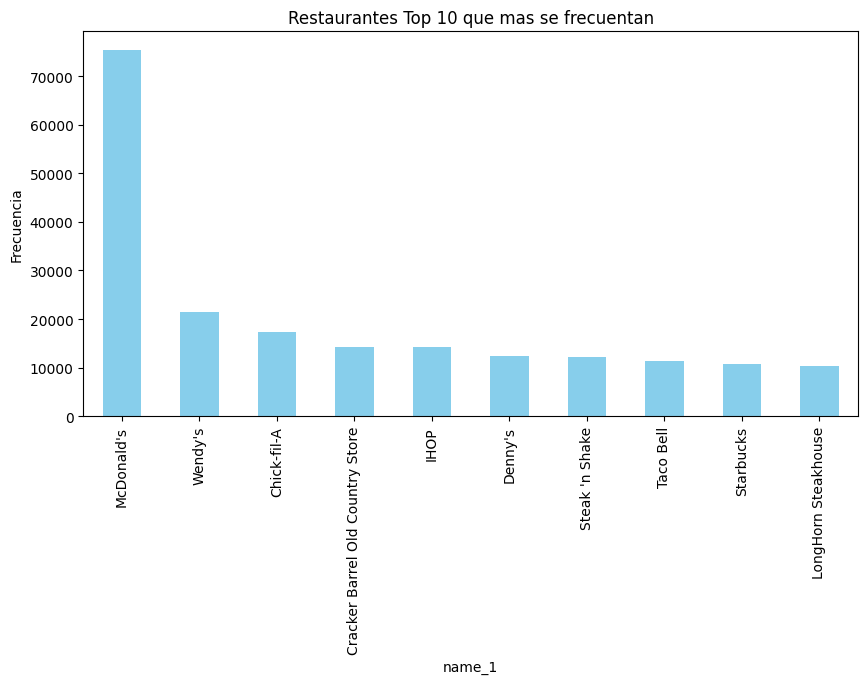

In [ ]:
# Conteo de frecuencias para los nombres
top_cities = df_google_maps['name_1'].value_counts().head(10)
top_cities.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Restaurantes Top 10 que mas se frecuentan")
plt.ylabel("Frecuencia")
plt.show()

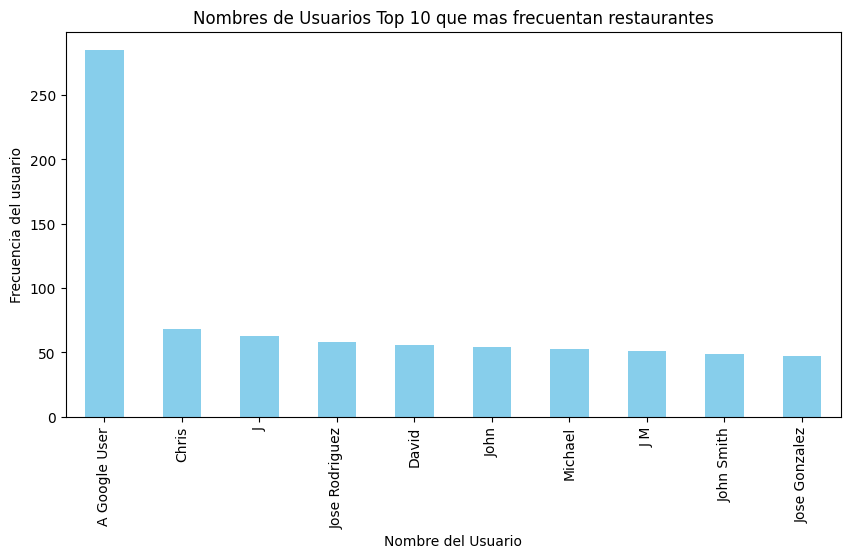

In [ ]:
# Conteo de usuarios únicos por cada restaurante
top_cities_unique_users = df_google_maps.groupby('name')['user_id'].nunique().nlargest(10)

# Graficar
top_cities_unique_users.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Nombres de Usuarios Top 10 que mas frecuentan restaurantes")
plt.ylabel("Frecuencia del usuario")
plt.xlabel("Nombre del Usuario")
plt.show()

### Analsis de sentimiento positivas y negativas

In [ ]:
df_google_maps.head(1)

,gmap_id,rating,text,resp,time,pics,name,user_id,name_1,address,gmap_id_1,description,latitude,longitude,category,avg_rating,num_of_reviews,price
0,0x88c33dd46be0d6f5:0xb0072e1b4b256f55,1,Flies everywhere!! We couldn’t enjoy our food....,{'text': 'Thank you for your review. We're sor...,1621194448030,[],Tammy Boyd,1.104493e+20,Whiskey Joe's Bar & Grill - Manatee River,"Whiskey Joe's Bar & Grill - Manatee River, 531...",0x88c33dd46be0d6f5:0xb0072e1b4b256f55,None,27.528301,-82.50876,"[Restaurant, Bar & grill, Event venue, Seafood...",4.0,1557,$$


In [ ]:
from textblob import TextBlob

# Función para analizar el sentimiento
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return 1 if analysis.sentiment.polarity > 0 else 0

# Reemplazar valores nulos en la columna 'text' con una cadena vacía
df_google_maps['text'] = df_google_maps['text'].fillna('')

# Aplicar el análisis de sentimiento en la columna 'text' y crear la nueva columna 'sentiment'
df_google_maps['sentiment'] = df_google_maps['text'].apply(analyze_sentiment)

# Mostrar los primeros resultados para verificar
print(df_google_maps[['text', 'sentiment']].head())

                                                text  sentiment
0  Flies everywhere!! We couldn’t enjoy our food....          0
1  This place will be going out of business soon ...          1
2  This my second time and my last time to dine a...          0
3  This place will be going out of business soon ...          1
4  Good place, good service, terrible food.\n"The...          1


In [ ]:
# Conteo de cada categoría de sentimiento
sentiment_counts = df_google_maps['sentiment'].value_counts()
print(sentiment_counts)


sentiment
1    484947
0    459092
Name: count, dtype: int64


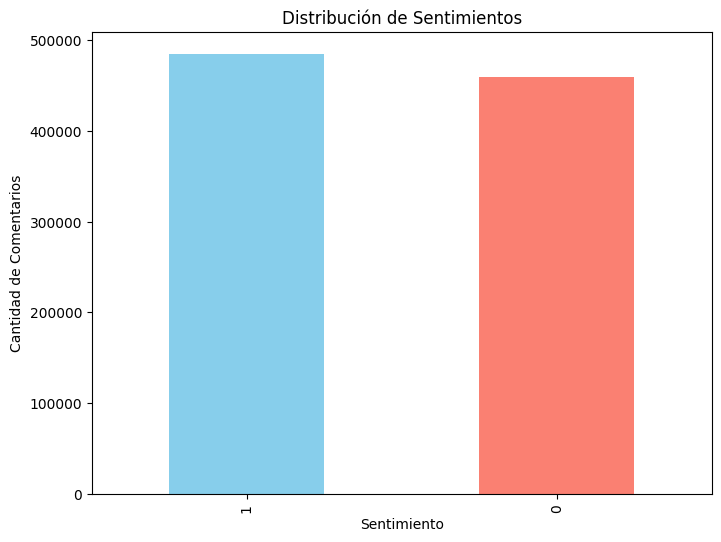

In [ ]:
# Gráfico de barras para distribución de sentimientos
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Distribución de Sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Comentarios")
plt.show()


Sentimientos negativos y positivos en categoria de restaurantes

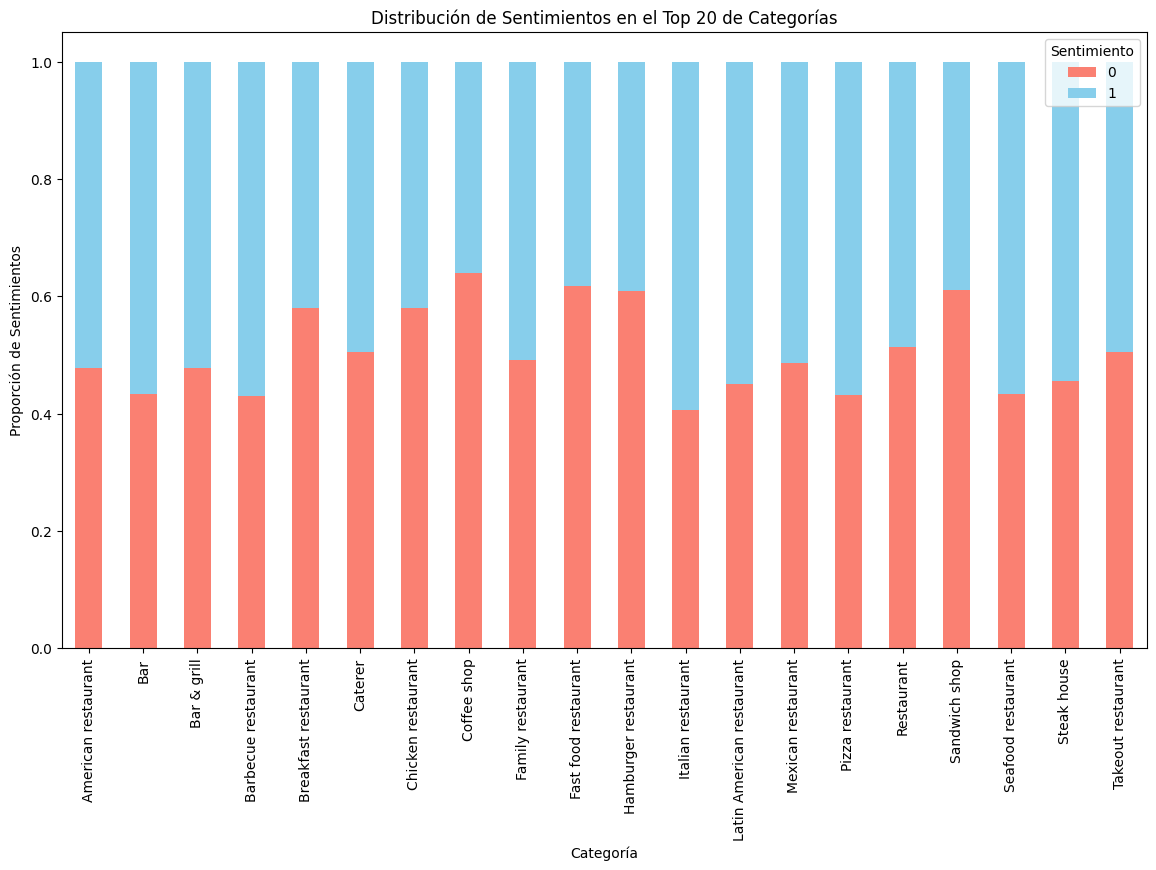

In [ ]:
# Expande las categorías para tener un registro por cada categoría única
df_expanded = df_google_maps.explode('category')

# Contar la frecuencia de cada categoría y obtener el top 20
top_categories = df_expanded['category'].value_counts().head(20).index

# Filtra el DataFrame solo con las categorías top 20
df_top_categories = df_expanded[df_expanded['category'].isin(top_categories)]

# Agrupar y graficar el análisis de sentimiento en las categorías más comunes
sentiment_by_category = df_top_categories.groupby('category')['sentiment'].value_counts(normalize=True).unstack()
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(14, 8), color=['salmon', 'skyblue', 'lightgreen'])
plt.title("Distribución de Sentimientos en el Top 20 de Categorías")
plt.xlabel("Categoría")
plt.ylabel("Proporción de Sentimientos")
plt.legend(title="Sentimiento")
plt.show()



Sentimientos negativos y positivos en restaurantes

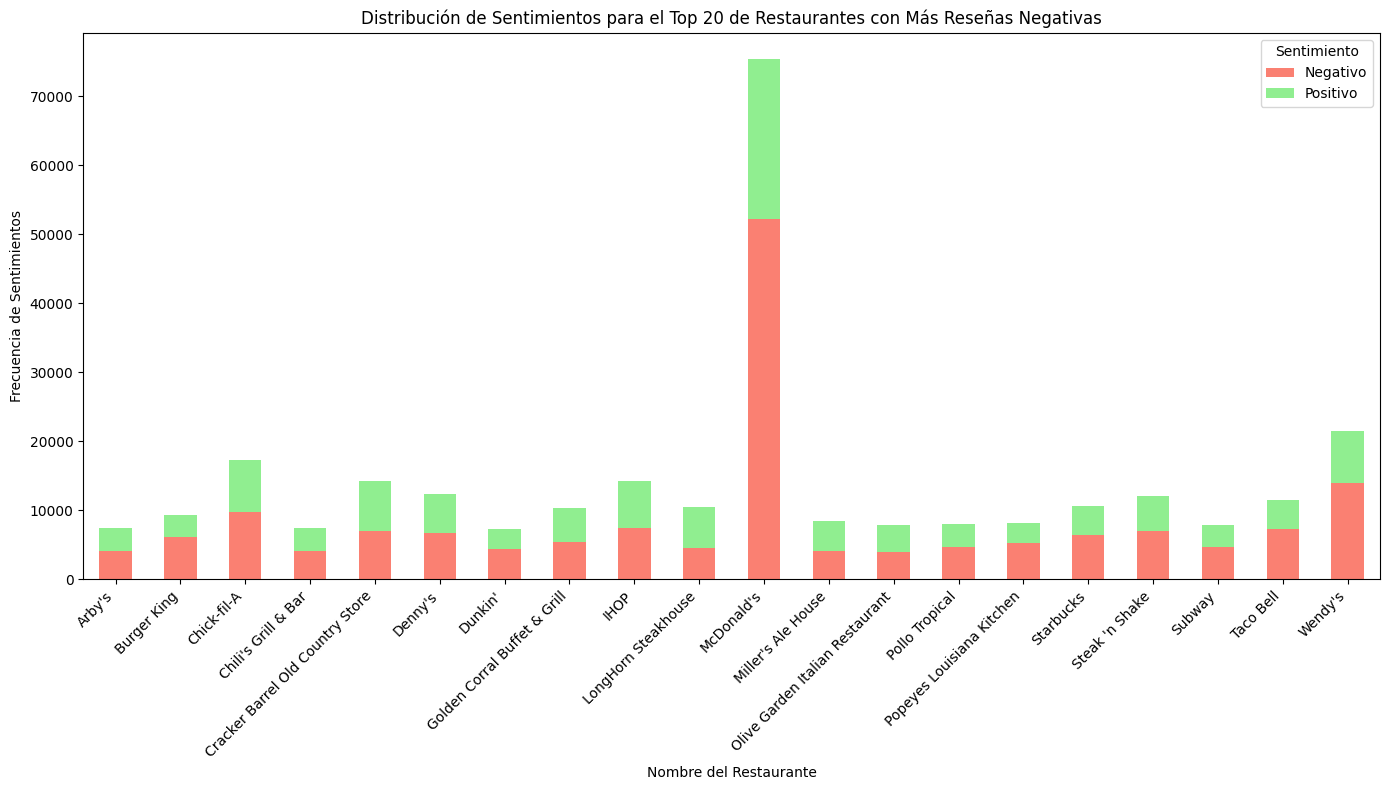

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongo que df_google_maps ya está definido como tu DataFrame
# Filtrar reseñas negativas
negative_reviews = df_google_maps[df_google_maps['sentiment'] == 0]

# Contar la frecuencia de cada nombre y obtener el top 20 de restaurantes con más reseñas negativas
top_negative_names = negative_reviews['name_1'].value_counts().head(20).index

# Filtrar DataFrame para solo los nombres en el top 20 de reseñas negativas
df_top_negative_names = negative_reviews[negative_reviews['name_1'].isin(top_negative_names)]

# Filtrar las reseñas positivas para esos mismos restaurantes
positive_reviews = df_google_maps[df_google_maps['sentiment'] == 1]
df_top_positive_names = positive_reviews[positive_reviews['name_1'].isin(top_negative_names)]

# Concatenar ambos DataFrames
df_combined = pd.concat([df_top_negative_names, df_top_positive_names])

# Agrupar y contar la distribución de sentimientos
sentiment_distribution = df_combined.groupby(['name_1', 'sentiment']).size().unstack(fill_value=0)

# Crear gráfico de barras
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), color=['salmon', 'lightgreen'])
plt.title("Distribución de Sentimientos para el Top 20 de Restaurantes con Más Reseñas Negativas")
plt.xlabel("Nombre del Restaurante")
plt.ylabel("Frecuencia de Sentimientos")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentimiento", labels=["Negativo", "Positivo"])
plt.tight_layout()
plt.show()


### Relación entre estrellas y número de reviews

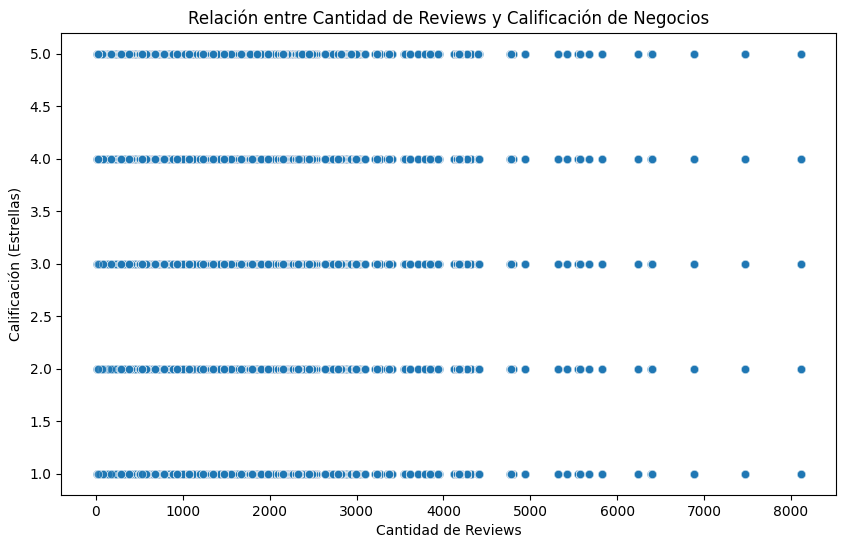

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_of_reviews', y='rating', data=df_google_maps, alpha=0.5)
plt.title("Relación entre Cantidad de Reviews y Calificación de Negocios")
plt.xlabel("Cantidad de Reviews")
plt.ylabel("Calificación (Estrellas)")
plt.show()

### Gráfico de torta para todas las calificaciones de estrellas

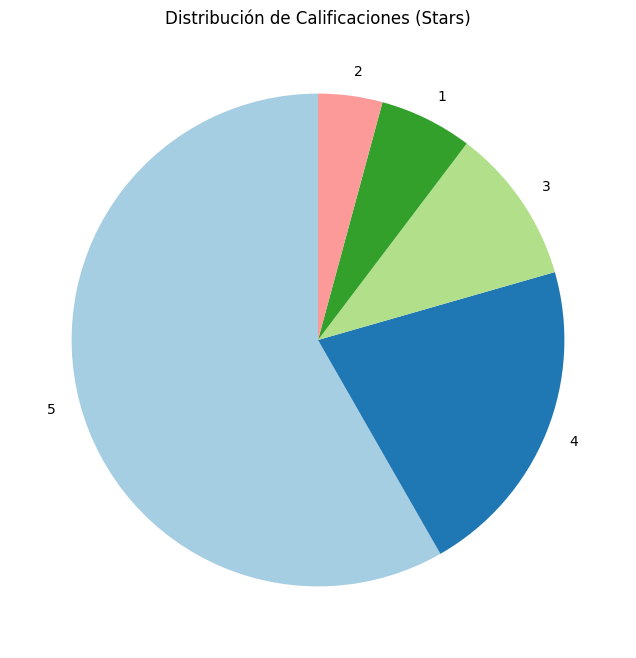

In [ ]:
# Conteo de todas las calificaciones de estrellas
stars_counts = df_google_maps['rating'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(stars_counts, labels=stars_counts.index, startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribución de Calificaciones (Stars)")
plt.show()